# BYTETrack Demo on Basketball Players Tracking

In [ ]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
"""
  ████
██    ██   Datature
  ██  ██   Powering Breakthrough AI
    ██
 
@File    :   bytetrack_basketball.ipynb
@Author  :   Ben Quan
@Version :   1.0
@Contact :   hello@datature.io
@License :   Apache License 2.0
@Desc    :   BYTETrack Demo on Basketball Players Tracking
"""

## Install Dependencies

In [1]:
!nvidia-smi

Tue Feb 28 03:11:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install YOLOv8 and BYTETrack

In [2]:
!git clone https://github.com/ifzhang/ByteTrack.git
%cd ByteTrack
!pip3 install -r requirements.txt
!python3 setup.py develop
!pip3 install cython
!pip3 install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip3 install cython_bbox

!pip install ultralytics --quiet

## OR

# git clone https://github.com/ultralytics/ultralytics
# cd ultralytics
# pip install -e ultralytics

Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007
Receiving objects: 100% (2007/2007), 79.60 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
/content/ByteTrack
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 674.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.6 MB/s eta 

### Import Packages

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import random
from PIL import Image as PILImage
import cv2
import numpy as np
import yaml
import torch
import time
from collections import deque

## Dataset Preparation

In [4]:
HOME = "/content/ByteTrack"

In [5]:
%cd "/{HOME}/datasets"
!pip3 install --upgrade gdown
!gdown https://drive.google.com/uc?id=1pnROnk0AY-naKLu1zfM6WRyidckSpPwg
!unzip -o basketball.zip 
%cd ..

/content/ByteTrack/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1pnROnk0AY-naKLu1zfM6WRyidckSpPwg
To: /content/ByteTrack/datasets/basketball.zip
100% 342M/342M [00:02<00:00, 126MB/s]
Archive:  basketball.zip
  inflating: basketball.yaml         
  inflating: game3.mp4               
  inflating: game3_short.mp4         
  inflating: game4.mp4               
 extracting: label.labels            
   creating: training/
  inflating: training/game3.mp4#frame=10025.jpg  
  inflating: training/game3.mp4#frame=10025.txt  
  inflating: training/game3.mp4#frame=10225.jpg  
  inflating: training/game3.mp4#frame=10225.txt  
  inflating: training/game3.mp4#frame=10274.jpg  
  inflating: training/game3.mp4#frame=10274.txt  
  inflating: tra

## Train YOLOv8 Detector

In [6]:
TEST_SIZE = 640
BATCH_SIZE = 4
EPOCHS = 50

In [7]:
%cd {HOME}

# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data=f"{HOME}/datasets/basketball.yaml", imgsz=TEST_SIZE, batch=BATCH_SIZE, epochs=EPOCHS, plots=True)

/content/ByteTrack


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.47 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/ByteTrack/datasets/basketball.yaml, epochs=50, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, 

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.Conv                  [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.Conv                  [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.C2f                   [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.Conv                  [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.C2f                   [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.Conv                  [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.C2f                   [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

### Check Detector Output on Frame

In [ ]:
%cd {HOME}

training_run = "train"
model = YOLO(f"{HOME}/runs/detect/{training_run}/weights/best.pt")
sample_img = f"{HOME}/datasets/validation/game3.mp4#frame=12821.jpg"
results = model.predict(source=sample_img, show = True, conf=0.45, save=True)

/content/ByteTrack


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.41 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/ByteTrack/datasets/validation/game3.mp4#frame=12821.jpg: 384x640 5 warriorss, 5 celticss, 3 referees, 1 basketball, 42.6ms
Speed: 0.5ms preprocess, 42.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


([], <a list of 0 Text major ticklabel objects>)

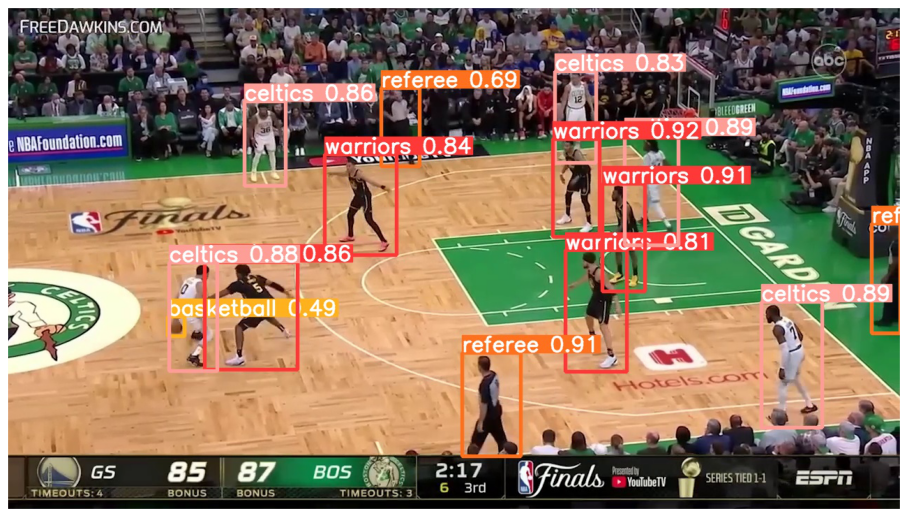

In [ ]:
plt.figure(figsize=(16,10))
img = PILImage.open(f"{HOME}/runs/detect/predict2/game3.mp4#frame=12821.jpg")
plt.imshow(img)
plt.grid(None)
plt.xticks([])
plt.yticks([])

### Check Detector Output on Video

In [ ]:
%cd {HOME}

!yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.25 source=./datasets/game3_short.mp4 save=True

/content/ByteTrack
Ultralytics YOLOv8.0.41 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/437) /content/ByteTrack/datasets/game3_short.mp4: 384x640 5 warriorss, 5 celticss, 3 referees, 29.0ms
video 1/1 (2/437) /content/ByteTrack/datasets/game3_short.mp4: 384x640 5 warriorss, 5 celticss, 3 referees, 26.4ms
video 1/1 (3/437) /content/ByteTrack/datasets/game3_short.mp4: 384x640 5 warriorss, 5 celticss, 3 referees, 26.4ms
video 1/1 (4/437) /content/ByteTrack/datasets/game3_short.mp4: 384x640 5 warriorss, 5 celticss, 3 referees, 1 basketball, 26.4ms
video 1/1 (5/437) /content/ByteTrack/datasets/game3_short.mp4: 384x640 5 warriorss, 5 celticss, 3 referees, 26.4ms
video 1/1 (6/437) /content/ByteTrack/datasets/game3_short.mp4: 384x640 5 warriorss, 5 celticss, 3 referees, 26.4ms
video 1/1 (7/437) /content/ByteTrack/datasets/game3_short.mp4: 384x640 5 warriorss, 5 celticss, 3 referees, 

In [ ]:
# == Convert mp4 to webm video file for proper display on colab ==
!ffmpeg -i runs/detect/predict3/game3_short.mp4 -vcodec vp9 detect_vid.webm

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# == Display results ==
from IPython.display import HTML
from base64 import b64encode

video_path = './detect_vid.webm'

mp4 = open(video_path, "rb").read()
data_url = "data:video/webm;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=600 controls>
      <source src="{data_url}" type="video/webm">
</video>
""")

## Tracking with BYTETrack

### Utility Functions

In [ ]:
with open(f"{HOME}/datasets/basketball.yaml", "r") as f:
    settings = yaml.safe_load(f)

ID2CLASSES = settings["names"]
CLASSES = ID2CLASSES.values()
TEXT_COLOR = (0, 0, 255)
COLORS = [(0, 255, 0),
          (255, 0, 0),
          (255, 255, 0),
          (0, 255, 255)]

text_scale = 1.5
text_thickness = 2
line_thickness = 2

In [ ]:
def calculate_centroid(tl_x, tl_y, w, h):
    mid_x = int(tl_x + w/2)
    mid_y = int(tl_y + h/2)
    return mid_x, mid_y 

def convert_output(outputs: torch.Tensor):
    # Output of format []
    return 

def convert_history_to_dict(track_history):
    history_dict = {}
    for frame_content in track_history:
        obj_ids, tlwhs, _ = frame_content
        for obj_id, tlwh in zip(obj_ids, tlwhs):
            tl_x, tl_y, w, h = tlwh
            mid_x, mid_y = calculate_centroid(tl_x, tl_y, w, h)
            
            if obj_id not in history_dict.keys():
                history_dict[obj_id] = [[mid_x, mid_y]]
            else:
                history_dict[obj_id].append([mid_x, mid_y])
            
    return history_dict

def plot_tracking(image, track_history):
    obj_ids, tlwhs, class_ids = track_history[-1]
    history_dict = convert_history_to_dict(track_history)
    
    im = np.ascontiguousarray(np.copy(image))
    im_h, im_w = im.shape[:2]

    top_view = np.zeros([im_w, im_w, 3], dtype=np.uint8) + 255
    
    num_detections = len(tlwhs)
    label_count = {class_name: 0 for class_name in CLASSES}
    for label_idx in class_ids:
        label_count[ID2CLASSES[label_idx]] += 1

    for i, tlwh in enumerate(tlwhs):
        x1, y1, w, h = tlwh
        intbox = tuple(map(int, (x1, y1, x1 + w, y1 + h)))
        obj_id = int(obj_ids[i])
        class_id = class_ids[i]
        id_text = '{}'.format(int(obj_id))
        color = COLORS[class_id]
        cv2.rectangle(im, intbox[0:2], intbox[2:4], color=color, thickness=line_thickness)
        cv2.putText(im, id_text, (intbox[0], intbox[1]), cv2.FONT_HERSHEY_PLAIN, text_scale, color,
                    thickness=text_thickness)
        cv2.putText(im, ID2CLASSES[class_id], (intbox[0], intbox[3] + 20) , cv2.FONT_HERSHEY_PLAIN, text_scale, color, thickness = text_thickness)
        
        for idx in range(len(history_dict[obj_id]) - 1):
            prev_point, next_point = history_dict[obj_id][idx], history_dict[obj_id][idx+ 1] 
            cv2.line(im, prev_point, next_point, color, 2)
             
    return im

### Hyperparameter Settings

In [ ]:
class ByteTrackArgument:
    track_thresh = 0.5
    track_buffer = 50
    match_thresh = 0.8
    aspect_ratio_thresh = 10.0
    min_box_area = 1.0
    mot20 = False

MIN_THRESHOLD = 0.001
INPUT_VIDEO_PATH = f"{HOME}/datasets/game3_short.mp4"
save_result = True
plot_basketball = False

### Tracking Loop

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker

In [ ]:
save_folder = f"{HOME}/output_videos"
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, INPUT_VIDEO_PATH.split("/")[-1][:-4] + ".avi")
training_run = "train"

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_ckpt = f"{HOME}/runs/detect/{training_run}/weights/best.pt"
print(f"Load model at {model_ckpt}")
model = YOLO(model_ckpt)

cap = cv2.VideoCapture(INPUT_VIDEO_PATH)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float
fps = cap.get(cv2.CAP_PROP_FPS)

print(f"video save_path is {save_path}")

# vid_writer = cv2.VideoWriter(
#     save_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (int(width), int(height))
# )

vid_writer = cv2.VideoWriter(
    save_path, cv2.VideoWriter_fourcc(*'DIVX'), fps, (int(width), int(height))
)

trackers = [BYTETracker(ByteTrackArgument), BYTETracker(ByteTrackArgument), BYTETracker(ByteTrackArgument)]
frame_id = 0
results = []
history = deque()

while True:
    if frame_id % 20 == 0:
        print(f'Processing frame {frame_id}.')
    ret_val, online_im = cap.read()
    if ret_val:
        outputs = model.predict(source=online_im, conf=MIN_THRESHOLD)
        img_height, img_width = outputs[0].boxes.orig_shape
        outputs = outputs[0].boxes.boxes
        all_tlwhs = []
        all_ids = []
        all_classes = []
        for i, tracker in enumerate(trackers):
            class_outputs = outputs[outputs[:, 5] == i][:,:5]
            if class_outputs is not None:
                online_targets = tracker.update(class_outputs.cpu(), [img_height, img_width], [img_height.item(), img_width.item()])
                online_tlwhs = []
                online_ids = []
                online_scores = []
                online_classes = [i] * len(online_targets)
                for t in online_targets:
                    tlwh = t.tlwh
                    tid = t.track_id
                    vertical = tlwh[2] / tlwh[3] > ByteTrackArgument.aspect_ratio_thresh
                    if tlwh[2] * tlwh[3] > ByteTrackArgument.min_box_area and not vertical:
                        online_tlwhs.append(tlwh)
                        online_ids.append(tid)
                        online_scores.append(t.score)
                        box = (tlwh[0], tlwh[1], tlwh[2], tlwh[3])
                        results.append(
                            # frame_id, track_id, tl_x, tl_y, w, h, score = obj_prob * class_prob, class_idx, dummy, dummy, dummy
                            f"{frame_id},{tid},{tlwh[0]:.2f},{tlwh[1]:.2f},{tlwh[2]:.2f},{tlwh[3]:.2f},{t.score:.2f},-1,-1,-1\n"
                            )

                all_tlwhs += online_tlwhs
                all_ids += online_ids
                all_classes += online_classes

        if plot_basketball:
            basketball_outputs = outputs[outputs[:, 5] == 3].cpu().numpy()
            if basketball_outputs is not None:
                max_idx = np.argmax(basketball_outputs[:, 4])
                basketball_bbox = basketball_outputs[max_idx, :][:4]
                conf = basketball_outputs[max_idx, :][4]
                if conf > 0.5:
                    x1, y1, w, h = basketball_bbox
                    intbox = tuple(map(int, (x1, y1, x1 + w, y1 + h)))
                    class_id = 3
                    color = COLORS[class_id]
                    cv2.rectangle(online_im, intbox[0:2], intbox[2:4], color=color, thickness=line_thickness)
                    cv2.putText(online_im, ID2CLASSES[class_id], (intbox[0], intbox[3] + 20) , cv2.FONT_HERSHEY_PLAIN, text_scale, color, thickness = text_thickness)
            
            else:
                continue

        if len(history) < 30:
            history.append((all_ids, all_tlwhs, all_classes))
        else:
            history.popleft()
            history.append((all_ids, all_tlwhs, all_classes))

        if len(all_tlwhs) > 0:
            online_im = plot_tracking(
                online_im, history
            )

        else:
            online_im = online_im

        # # For Debug
        # plt.figure(figsize = (16,10))
        # plt.imshow(online_im)
        # break

        if save_result:
            online_im = cv2.resize(online_im, (int(width), int(height)))
            vid_writer.write(online_im)
        ch = cv2.waitKey(1)
        if ch == 27 or ch == ord("q") or ch == ord("Q"):
            break
    else:
        break

    frame_id += 1


Ultralytics YOLOv8.0.41 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Load model at /content/ByteTrack/runs/detect/train/weights/best.pt
video save_path is /content/ByteTrack/output_videos/game3_short.avi
Processing frame 0.


Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

0: 384x640 29 warriorss, 27 celticss, 16 referees, 16 basketballs, 27.0ms
Speed: 0.5ms preprocess, 27.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 32 warriorss, 27 celticss, 13 referees, 13 basketballs, 26.8ms
Speed: 0.6ms preprocess, 26.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 33 warriorss, 23 celticss, 12 referees, 14 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 warriorss, 24 celticss, 9 referees, 22 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 25 warriorss, 25 celticss, 8 referees, 18 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 warriorss, 18 celticss, 8 referees, 18 basketb

Processing frame 20.


0: 384x640 20 warriorss, 24 celticss, 14 referees, 27 basketballs, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 warriorss, 21 celticss, 12 referees, 28 basketballs, 25.9ms
Speed: 0.9ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 warriorss, 16 celticss, 11 referees, 18 basketballs, 26.1ms
Speed: 0.9ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 25 warriorss, 20 celticss, 14 referees, 31 basketballs, 26.7ms
Speed: 0.9ms preprocess, 26.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 warriorss, 26 celticss, 13 referees, 36 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 warriorss, 23 celticss, 9 referees, 35 basketballs, 25.8ms
Speed: 0.5ms preprocess, 25.8ms inference, 1.6ms postprocess per im

Processing frame 40.



0: 384x640 19 warriorss, 26 celticss, 9 referees, 28 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 warriorss, 23 celticss, 9 referees, 27 basketballs, 25.9ms
Speed: 0.7ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 29 warriorss, 33 celticss, 9 referees, 25 basketballs, 26.0ms
Speed: 0.6ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 28 warriorss, 33 celticss, 7 referees, 30 basketballs, 26.2ms
Speed: 0.6ms preprocess, 26.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 28 warriorss, 30 celticss, 8 referees, 34 basketballs, 25.8ms
Speed: 0.6ms preprocess, 25.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 31 warriorss, 26 celticss, 9 referees, 23 basketballs, 26.1ms
Speed: 0.6ms preprocess, 26.1ms inference, 1.7ms postprocess per image 

Processing frame 60.


0: 384x640 29 warriorss, 40 celticss, 13 referees, 16 basketballs, 25.9ms
Speed: 1.6ms preprocess, 25.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 29 warriorss, 40 celticss, 11 referees, 22 basketballs, 26.0ms
Speed: 0.6ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 25 warriorss, 30 celticss, 10 referees, 16 basketballs, 26.1ms
Speed: 0.6ms preprocess, 26.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 37 warriorss, 31 celticss, 10 referees, 18 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 35 warriorss, 38 celticss, 11 referees, 21 basketballs, 96.3ms
Speed: 0.5ms preprocess, 96.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 34 warriorss, 40 celticss, 15 referees, 23 basketballs, 26.8ms
Speed: 0.6ms preprocess, 26.8ms inference, 1.7ms postprocess per i

Processing frame 80.


0: 384x640 28 warriorss, 36 celticss, 14 referees, 18 basketballs, 25.9ms
Speed: 0.7ms preprocess, 25.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 33 warriorss, 34 celticss, 19 referees, 19 basketballs, 27.1ms
Speed: 0.6ms preprocess, 27.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 35 warriorss, 34 celticss, 21 referees, 15 basketballs, 25.9ms
Speed: 0.5ms preprocess, 25.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 35 warriorss, 36 celticss, 17 referees, 23 basketballs, 25.8ms
Speed: 0.5ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 36 warriorss, 37 celticss, 20 referees, 23 basketballs, 25.8ms
Speed: 0.6ms preprocess, 25.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 36 warriorss, 32 celticss, 18 referees, 26 basketballs, 28.3ms
Speed: 0.7ms preprocess, 28.3ms inference, 1.6ms postprocess per i

Processing frame 100.


0: 384x640 35 warriorss, 35 celticss, 19 referees, 27 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 40 warriorss, 31 celticss, 16 referees, 26 basketballs, 25.9ms
Speed: 0.7ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 32 warriorss, 27 celticss, 14 referees, 33 basketballs, 25.9ms
Speed: 1.0ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 28 warriorss, 28 celticss, 13 referees, 27 basketballs, 26.0ms
Speed: 1.1ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 25 warriorss, 29 celticss, 15 referees, 18 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 warriorss, 37 celticss, 19 referees, 25 basketballs, 26.1ms
Speed: 0.9ms preprocess, 26.1ms inference, 1.7ms postprocess per i

Processing frame 120.



0: 384x640 35 warriorss, 30 celticss, 21 referees, 29 basketballs, 26.9ms
Speed: 0.6ms preprocess, 26.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 27 warriorss, 29 celticss, 19 referees, 24 basketballs, 26.7ms
Speed: 1.2ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 29 warriorss, 43 celticss, 19 referees, 28 basketballs, 26.8ms
Speed: 0.9ms preprocess, 26.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 31 warriorss, 33 celticss, 28 referees, 30 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 27 warriorss, 28 celticss, 28 referees, 21 basketballs, 26.5ms
Speed: 0.9ms preprocess, 26.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 27 warriorss, 41 celticss, 22 referees, 28 basketballs, 26.4ms
Speed: 0.8ms preprocess, 26.4ms inference, 2.4ms postprocess per 

Processing frame 140.



0: 384x640 37 warriorss, 32 celticss, 14 referees, 19 basketballs, 26.6ms
Speed: 0.6ms preprocess, 26.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 40 warriorss, 33 celticss, 16 referees, 24 basketballs, 26.9ms
Speed: 0.8ms preprocess, 26.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 50 warriorss, 34 celticss, 16 referees, 23 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 43 warriorss, 32 celticss, 14 referees, 17 basketballs, 26.5ms
Speed: 1.0ms preprocess, 26.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 46 warriorss, 38 celticss, 17 referees, 16 basketballs, 26.6ms
Speed: 0.6ms preprocess, 26.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 57 warriorss, 45 celticss, 17 referees, 21 basketballs, 26.7ms
Speed: 0.6ms preprocess, 26.7ms inference, 2.2ms postprocess per 

Processing frame 160.


0: 384x640 35 warriorss, 39 celticss, 21 referees, 21 basketballs, 26.6ms
Speed: 0.6ms preprocess, 26.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 37 warriorss, 35 celticss, 19 referees, 23 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 43 warriorss, 33 celticss, 22 referees, 24 basketballs, 26.4ms
Speed: 0.5ms preprocess, 26.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 43 warriorss, 36 celticss, 22 referees, 28 basketballs, 26.5ms
Speed: 0.7ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 38 warriorss, 35 celticss, 15 referees, 27 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 42 warriorss, 40 celticss, 13 referees, 28 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.6ms postprocess per i

Processing frame 180.


0: 384x640 36 warriorss, 42 celticss, 20 referees, 30 basketballs, 29.3ms
Speed: 0.8ms preprocess, 29.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 31 warriorss, 35 celticss, 21 referees, 20 basketballs, 26.7ms
Speed: 4.6ms preprocess, 26.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 34 warriorss, 39 celticss, 19 referees, 15 basketballs, 26.5ms
Speed: 0.7ms preprocess, 26.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 41 warriorss, 31 celticss, 19 referees, 25 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 46 warriorss, 46 celticss, 22 referees, 26 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 39 warriorss, 42 celticss, 21 referees, 16 basketballs, 26.6ms
Speed: 0.6ms preprocess, 26.6ms inference, 1.6ms postprocess per i

Processing frame 200.


0: 384x640 27 warriorss, 35 celticss, 13 referees, 20 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 34 warriorss, 30 celticss, 18 referees, 17 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 warriorss, 29 celticss, 15 referees, 27 basketballs, 26.0ms
Speed: 0.6ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 25 warriorss, 33 celticss, 10 referees, 11 basketballs, 26.1ms
Speed: 0.7ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 26 warriorss, 33 celticss, 16 referees, 20 basketballs, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 warriorss, 79 celticss, 60 referees, 12 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.7ms postprocess per i

Processing frame 220.



0: 384x640 27 warriorss, 15 celticss, 17 referees, 23 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 28 warriorss, 22 celticss, 10 referees, 27 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 31 warriorss, 20 celticss, 15 referees, 26 basketballs, 26.5ms
Speed: 0.9ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 30 warriorss, 26 celticss, 14 referees, 22 basketballs, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 warriorss, 33 celticss, 8 referees, 23 basketballs, 26.8ms
Speed: 0.7ms preprocess, 26.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 30 warriorss, 31 celticss, 10 referees, 36 basketballs, 26.4ms
Speed: 0.9ms preprocess, 26.4ms inference, 1.7ms postprocess per i

Processing frame 240.


Speed: 0.9ms preprocess, 26.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 28 warriorss, 26 celticss, 14 referees, 32 basketballs, 25.8ms
Speed: 0.7ms preprocess, 25.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 27 warriorss, 21 celticss, 12 referees, 27 basketballs, 27.0ms
Speed: 0.7ms preprocess, 27.0ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 warriorss, 19 celticss, 8 referees, 20 basketballs, 25.9ms
Speed: 0.5ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 25 warriorss, 20 celticss, 12 referees, 17 basketballs, 25.8ms
Speed: 0.6ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 30 warriorss, 27 celticss, 13 referees, 26 basketballs, 27.2ms
Speed: 0.6ms preprocess, 27.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 warriorss, 25 celticss, 15 re

Processing frame 260.


Speed: 0.6ms preprocess, 26.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 45 warriorss, 29 celticss, 10 referees, 24 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 37 warriorss, 35 celticss, 9 referees, 15 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 38 warriorss, 28 celticss, 11 referees, 15 basketballs, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 42 warriorss, 26 celticss, 8 referees, 15 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 39 warriorss, 23 celticss, 16 referees, 18 basketballs, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 31 warriorss, 28 celticss, 15 ref

Processing frame 280.


0: 384x640 34 warriorss, 30 celticss, 16 referees, 19 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 34 warriorss, 24 celticss, 10 referees, 24 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 warriorss, 20 celticss, 11 referees, 26 basketballs, 26.0ms
Speed: 0.6ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 33 warriorss, 24 celticss, 18 referees, 33 basketballs, 36.4ms
Speed: 0.6ms preprocess, 36.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 38 warriorss, 27 celticss, 19 referees, 27 basketballs, 27.6ms
Speed: 0.6ms preprocess, 27.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 32 warriorss, 27 celticss, 17 referees, 31 basketballs, 27.0ms
Speed: 0.6ms preprocess, 27.0ms inference, 2.1ms postprocess per i

Processing frame 300.


0: 384x640 35 warriorss, 34 celticss, 15 referees, 49 basketballs, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 37 warriorss, 25 celticss, 18 referees, 34 basketballs, 26.5ms
Speed: 0.5ms preprocess, 26.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 38 warriorss, 32 celticss, 17 referees, 37 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 28 warriorss, 26 celticss, 12 referees, 38 basketballs, 26.4ms
Speed: 0.5ms preprocess, 26.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 warriorss, 27 celticss, 18 referees, 26 basketballs, 26.6ms
Speed: 0.6ms preprocess, 26.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 29 warriorss, 33 celticss, 17 referees, 34 basketballs, 26.6ms
Speed: 0.6ms preprocess, 26.6ms inference, 1.9ms postprocess per i

Processing frame 320.



0: 384x640 18 warriorss, 35 celticss, 9 referees, 31 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 warriorss, 33 celticss, 13 referees, 35 basketballs, 26.5ms
Speed: 0.7ms preprocess, 26.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 26 warriorss, 30 celticss, 13 referees, 39 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 27 warriorss, 34 celticss, 15 referees, 36 basketballs, 26.9ms
Speed: 0.6ms preprocess, 26.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 30 warriorss, 32 celticss, 16 referees, 34 basketballs, 26.8ms
Speed: 0.6ms preprocess, 26.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 warriorss, 34 celticss, 14 referees, 41 basketballs, 26.7ms
Speed: 0.6ms preprocess, 26.7ms inference, 2.4ms postprocess per i

Processing frame 340.


0: 384x640 22 warriorss, 28 celticss, 9 referees, 32 basketballs, 26.1ms
Speed: 0.6ms preprocess, 26.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 warriorss, 35 celticss, 10 referees, 26 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 30 warriorss, 33 celticss, 16 referees, 30 basketballs, 25.8ms
Speed: 0.6ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 warriorss, 32 celticss, 11 referees, 31 basketballs, 26.0ms
Speed: 0.5ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 32 warriorss, 34 celticss, 11 referees, 23 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 30 warriorss, 26 celticss, 11 referees, 21 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 3.3ms postprocess per im

Processing frame 360.


0: 384x640 33 warriorss, 43 celticss, 22 referees, 24 basketballs, 25.8ms
Speed: 0.6ms preprocess, 25.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 25 warriorss, 36 celticss, 13 referees, 24 basketballs, 26.7ms
Speed: 1.8ms preprocess, 26.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 warriorss, 26 celticss, 16 referees, 20 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 34 warriorss, 25 celticss, 19 referees, 26 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 31 warriorss, 30 celticss, 19 referees, 31 basketballs, 26.1ms
Speed: 0.6ms preprocess, 26.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 30 warriorss, 37 celticss, 15 referees, 25 basketballs, 25.9ms
Speed: 0.6ms preprocess, 25.9ms inference, 1.7ms postprocess per i

Processing frame 380.



0: 384x640 26 warriorss, 36 celticss, 11 referees, 30 basketballs, 25.8ms
Speed: 0.6ms preprocess, 25.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 28 warriorss, 42 celticss, 18 referees, 27 basketballs, 26.6ms
Speed: 0.5ms preprocess, 26.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 32 warriorss, 44 celticss, 18 referees, 20 basketballs, 26.4ms
Speed: 0.5ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 35 warriorss, 45 celticss, 18 referees, 26 basketballs, 26.4ms
Speed: 0.5ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 49 warriorss, 41 celticss, 20 referees, 27 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 43 warriorss, 35 celticss, 21 referees, 25 basketballs, 26.5ms
Speed: 1.0ms preprocess, 26.5ms inference, 1.6ms postprocess per 

Processing frame 400.


0: 384x640 40 warriorss, 27 celticss, 25 referees, 37 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 42 warriorss, 33 celticss, 23 referees, 36 basketballs, 26.5ms
Speed: 0.7ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 41 warriorss, 38 celticss, 25 referees, 28 basketballs, 26.5ms
Speed: 0.6ms preprocess, 26.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 41 warriorss, 29 celticss, 26 referees, 33 basketballs, 26.4ms
Speed: 0.6ms preprocess, 26.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 40 warriorss, 29 celticss, 26 referees, 34 basketballs, 26.8ms
Speed: 0.6ms preprocess, 26.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 31 warriorss, 29 celticss, 23 referees, 28 basketballs, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 1.5ms postprocess per i

Processing frame 420.


0: 384x640 50 warriorss, 47 celticss, 19 referees, 32 basketballs, 27.1ms
Speed: 0.5ms preprocess, 27.1ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 51 warriorss, 59 celticss, 27 referees, 30 basketballs, 25.8ms
Speed: 0.6ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 49 warriorss, 54 celticss, 30 referees, 30 basketballs, 26.5ms
Speed: 1.0ms preprocess, 26.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 39 warriorss, 44 celticss, 21 referees, 22 basketballs, 26.0ms
Speed: 0.9ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 47 warriorss, 49 celticss, 29 referees, 24 basketballs, 26.0ms
Speed: 0.6ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 48 warriorss, 51 celticss, 24 referees, 26 basketballs, 26.8ms
Speed: 0.7ms preprocess, 26.8ms inference, 1.6ms postprocess per i

## Copy Output Video to Drive

In [8]:
# Copy output file into Drive

%cd /content

from google.colab import drive
drive.mount("/content/drive")

/content
Mounted at /content/drive


In [ ]:
!cp -r /content/ByteTrack/output_videos/game3_short.avi "/content/drive/MyDrive/Datature"

In [ ]:
%cd {HOME}
# == Convert mp4 to webm video file for proper display on colab ==
!ffmpeg -i ./output_videos/game3_short.avi -vcodec vp9 output_videos/game3_short.webm

/content/ByteTrack
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --e

In [ ]:
%cd {HOME}

# == Display results ==
from IPython.display import HTML
from base64 import b64encode

video_path = './output_videos/game3_short.webm'

mp4 = open(video_path, "rb").read()
data_url = "data:video/webm;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=600 controls>
      <source src="{data_url}" type="video/webm">
</video>
""")

[Errno 2] No such file or directory: '{HOME'
/content/ByteTrack
